# 300_Analysis_Q1C


# _ Question One: Is There a Safest Time for Travel?_

## _ (C): Are people who drive for work more dangerous than non-occupational drivers?_


## Purpose

We will now begin to analyse and explore our newly validated and prepared datasets. In this notebook we will explore whether purpose of journey impacts road accident likelihood. In particular, we will analyse whether people who drive as part of work (eg. delivery driver) are involved in more accidents than people who do not drive for work (ie. non-occupationally). To do this, we will use our journey purpose of driver column.



### Notebook Contents:

* __1:__ A Closer look at the Data

* __2:__ Purpose of Journey
    * __2.1:__ Mapping Values


* __3:__ Age of Driver     
    * __3.1:__ Normalise
     
* __4:__ Saving to Pickle Files & Creating Data Dictionaries


## Datasets

* __Input__: 

*  700_Q1C_final_prep.pkl (Fully prepared dataset of UK Road Safety Data from 2005 - 2014, for RQ1(C))


* __Output__: 

* 300_analysis_Q1C_norm_num_by_purp_sex.pkl (Total number of accidents by M/F drivers and journey purpose, normalised.)

* 300_analysis_Q1C_norm_num_by_purp_age.pkl (Total number of accidents by Age band of drivers and journey purpose, normalised.)

In [2]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

module_path = os.path.abspath(os.path.join('../../data/..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.helpers import data_dictionary

%matplotlib inline

Since we have cleaned our initial dataset and saved only the columns which are relevant to this research question in a separate pickle file, we will read in this cleaned datasets for the purpose of answering this research question.

In [3]:
Q1C = pd.read_pickle('../../data/processed/700_Q1C_final_prep.pkl')
Q1C.shape

(792713, 18)

## 1.

## A closer look at the data

In [4]:
Q1C.head(2)

,Accident_Index,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Vehicle_Type,Sex_of_Driver,Age_Band_of_Driver,Journey_Purpose_of_Driver,Date_Day,Month,Year
1,200501BS00002,slight,1,1,05/01/2005,thursday,17:36,12,darkness - lights lit,fine no high winds,dry,bus or coach,male,36 - 45,occupational,05,01,2005
2,200501BS00003,slight,2,1,06/01/2005,friday,00:15,12,darkness - lights lit,fine no high winds,dry,bus or coach,male,26 - 35,occupational,06,01,2005


In [5]:
Q1C.tail(2)

,Accident_Index,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Vehicle_Type,Sex_of_Driver,Age_Band_of_Driver,Journey_Purpose_of_Driver,Date_Day,Month,Year
3004421,2014984138414,serious,3,2,17/12/2014,thursday,06:55,917,darkness - no lighting,raining no high winds,wet or damp,van / goods 3.5 tonnes mgw or under,male,36 - 45,commuting to/from work,17,12,2014
3004423,2014984139614,slight,2,2,24/12/2014,thursday,15:00,917,daylight,fine no high winds,wet or damp,bus or coach,male,36 - 45,occupational,24,12,2014


From above, we have shown the first and last 2 columns of the dataset which we wil be using to answer question One (C).

It is important to note that in order to answer this question, we will be using data from _2005 to 2014_ only.

## 2.
## Purpose of Journey

In order to analyse whether recreational or occupational drivers are involved in more road accidents, we need to create a new column stating whether the journey listed in our Journey_Purpose_of_Driver is occupational or recreational.

In [6]:
newcol = Q1C['Journey_Purpose_of_Driver'] #create new column called 'Occupational_Recreational' as a copy of Journey_Purpose_of_Driver column
new_Q1C = Q1C.assign(Occupational_Non=newcol)

In [7]:
new_Q1C.head(3)

,Accident_Index,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Vehicle_Type,Sex_of_Driver,Age_Band_of_Driver,Journey_Purpose_of_Driver,Date_Day,Month,Year,Occupational_Non
1,200501BS00002,slight,1,1,05/01/2005,thursday,17:36,12,darkness - lights lit,fine no high winds,dry,bus or coach,male,36 - 45,occupational,05,01,2005,occupational
2,200501BS00003,slight,2,1,06/01/2005,friday,00:15,12,darkness - lights lit,fine no high winds,dry,bus or coach,male,26 - 35,occupational,06,01,2005,occupational
13,200501BS00011,slight,2,5,15/01/2005,sunday,16:00,12,daylight,fine no high winds,dry,bus or coach,male,36 - 45,occupational,15,01,2005,occupational


## 2.1
### Mapping Values

Below we will map values to indicate whether journey purpose is occupational or non-occupational.

It is important to note that we are leaving the 'occupational' values the same, and we will map 'other' as non-occupational.

In [8]:
journey_purp_map = { 'commuting to/from work':'non-occupational', 'taking pupil to/from school':'non-occupational', 'pupil riding to/from school':'non-occupational', 'other':'non-occupational'} #define our map

To apply this map function:

* We must specify the column which we want to apply the mapping function to.
* We then must apply a lambda function to our map, which will replace any occurrence of a value that is present in the map, otherwise it will leave the value as the original.

We have used code from [this](https://stackoverflow.com/questions/17114904/python-pandas-replacing-strings-in-dataframe-with-numbers) stack overflow question to carry out the mapping function.

In [9]:
new_Q1C['Occupational_Non'] = new_Q1C['Occupational_Non'].apply(lambda s: journey_purp_map.get(s) if s in journey_purp_map else s)

In [10]:
new_Q1C.head(2)

,Accident_Index,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Vehicle_Type,Sex_of_Driver,Age_Band_of_Driver,Journey_Purpose_of_Driver,Date_Day,Month,Year,Occupational_Non
1,200501BS00002,slight,1,1,05/01/2005,thursday,17:36,12,darkness - lights lit,fine no high winds,dry,bus or coach,male,36 - 45,occupational,05,01,2005,occupational
2,200501BS00003,slight,2,1,06/01/2005,friday,00:15,12,darkness - lights lit,fine no high winds,dry,bus or coach,male,26 - 35,occupational,06,01,2005,occupational


### Group by Journey Purpose

Below we will group accidents by the 'Occupational_Non' column to see the total number of accidents by each group.

In [11]:
group_by_purpose = new_Q1C.groupby('Occupational_Non')
group_by_purpose.size()

Occupational_Non
non-occupational    333124
occupational        459589
dtype: int64

From above, we can get an initial insight into the data, which shows that people who drive for work are involved in more road accidents than non-occupational drivers.

## 3.
## Age of Driver

Below I will group the dataframe by sex of driver, to see how many males and females in total are involved in road accidents.

In [12]:
group_by_sex = new_Q1C.groupby('Sex_of_Driver')
group_by_sex.size()

Sex_of_Driver
female    198493
male      594220
dtype: int64

From above, we can see that there are more Males than Females involved in road accidents. We will take this into account below.

Now we will group the Accidents by both the 'Occupational_Non' and 'Sex_of_Driver' columns.

## 3.1
## Normalise

I will normalise this data to account for the fact that there are more Males than Females involved in road accidents, as we saw from above.

I will then plot a graph of this data, showing the percentage of male/female drivers involved in road accidents when journey purpose was both non-occupational or occupational, to see how these figures differ.

When we normalise, we are getting the sum of the all columns for each row in the dataset.

In [14]:
num_by_purp_sex = new_Q1C.groupby(
    ['Occupational_Non', 'Sex_of_Driver'])['Accident_Index'].count().unstack()

In [15]:
norm_num_by_purp_sex = num_by_purp_sex.copy() #create a dataframe as copy of original

In [16]:
cols_1 = norm_num_by_purp_sex.columns #define columns to normalise

In [17]:
sum_rows_1 = norm_num_by_purp_sex[cols_1].sum(axis=1) #calculate the sum of each row

In [18]:
norm_num_by_purp_sex[cols_1] = norm_num_by_purp_sex[cols_1].div(sum_rows_1, axis=0) #normalise all columns in the dataset by dividing them by the sum of each row

In [19]:
norm_num_by_purp_sex[cols_1] = 100*norm_num_by_purp_sex[cols_1] #multiply normalised data by 100 to get a percentage value.

Text(0,0.5,'% of Road Accidents')

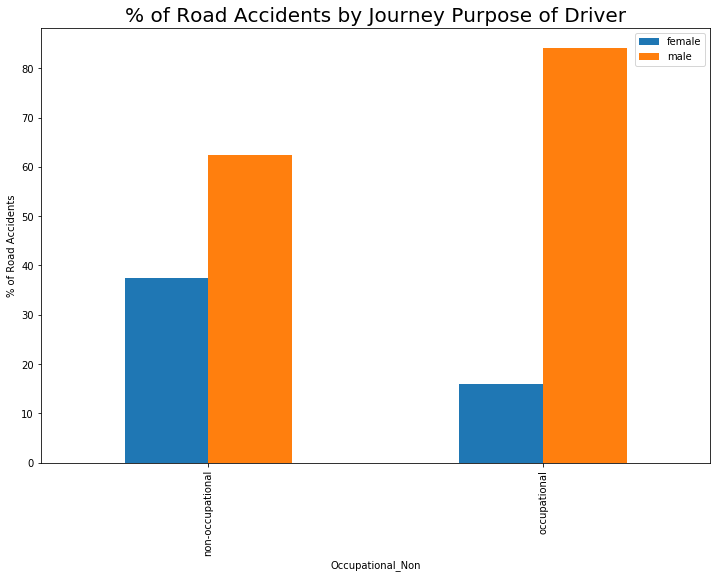

In [21]:
norm_num_by_purp_sex.plot(kind='bar', figsize=(12,8)).legend(bbox_to_anchor=(1,1))
plt.title('% of Road Accidents by Journey Purpose of Driver', fontsize=20)
plt.ylabel('% of Road Accidents')

From the above graph, we can clearly see that males contribute to a higher percentage of road accidents for both non-occupational and occupational journey purposes.

Below we will group the data by the 'Age_Band_of_Driver' column, to see how many drivers from each age band are involved in road accidents.

In [22]:
group_by_age = new_Q1C.groupby('Age_Band_of_Driver')
group_by_age.size()

Age_Band_of_Driver
0 - 5          49
11 - 15      4630
16 - 20     53874
21 - 25     89113
26 - 35    193328
36 - 45    204413
46 - 55    152556
56 - 65     78042
6 - 10        710
66 - 75     13127
75+          2871
dtype: int64

From above, we can see that most drivers are between the ages of 16-65. We will take this into account below.

Now we will group the data by both the 'Occupational_Non' and 'Age_Band_of_Driver' columns, to see which age group contributes to the most road accidents, based on journey purpose.

I will normalise this data to account for the fact that there is an uneven distribution of the ages of drivers, as seen above.

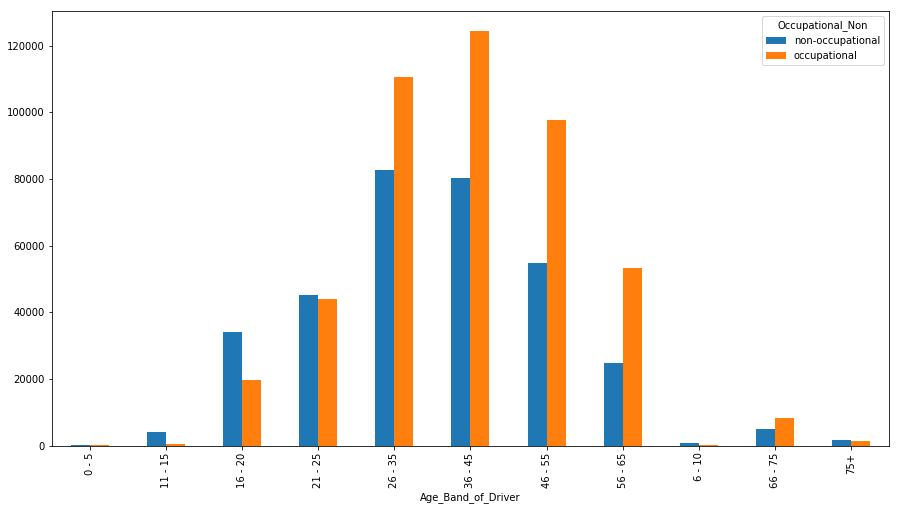

In [23]:
num_by_purp_age = new_Q1C.groupby(
    ['Occupational_Non', 'Age_Band_of_Driver'])['Accident_Index'].count().unstack()
num_by_purp_age.T.plot(kind='bar', figsize=(15,8))

From above, we can see that the highest concentration of all accidents is between the ages of 16-65, as seen earlier in the notebook. 

It is interesting to see that there is not a huge difference in the proportion of recreational and occupational journey accidents for most age bands, however it is clear that drivers between the ages of 36-45, who's purpose of journey is occupational, contribute to the most road accidents overall.

## Normalise

Below we will check to see the percentage of occupational and non-occupational drivers involved in road accidents:

In [24]:
group_by_purpose.size() #print the total number of occupational and non-occupational drivers

Occupational_Non
non-occupational    333124
occupational        459589
dtype: int64

In [25]:
print('% Occupational:', (459589/792713)*100) #getting the % of occupational drivers
print('% Non-Occupational:',(333124/792713)*100) #getting the % of non-occupational drivers)

% Occupational: 57.97672045242099
% Non-Occupational: 42.023279547579016


As we can see from above, there are more occupational drivers involved in road accidents than non-occupational drivers. To get a more accurate idea of the proportion of each driver within our dataset, we will normalise the data to get a percentage value.

When we normalise, we are getting the sum of the all columns for each row in the dataset.

In [26]:
norm_num_by_purp_age = num_by_purp_age.copy() #create a copy of original dataset for normalisation

In [27]:
norm_num_by_purp_age = norm_num_by_purp_age[['0 - 5', '6 - 10', '11 - 15', '16 - 20', '21 - 25', '26 - 35', '36 - 45',
       '46 - 55', '56 - 65', '66 - 75', '75+']] #re-arrange columns in order

In [28]:
cols = norm_num_by_purp_age.columns #define columns to normalise

In [29]:
sum_rows = norm_num_by_purp_age[cols].sum(axis=0) #calculate the sum of each row

In [30]:
norm_num_by_purp_age[cols] = norm_num_by_purp_age[cols].div(sum_rows, axis=1) #normalise all columns in the dataset by dividing them by the sum of each row

In [31]:
norm_num_by_purp_age[cols] = 100*norm_num_by_purp_age[cols] #multiply normalised data by 100 to get a percentage value.

Text(0,0.5,'% Of Road Accidents')

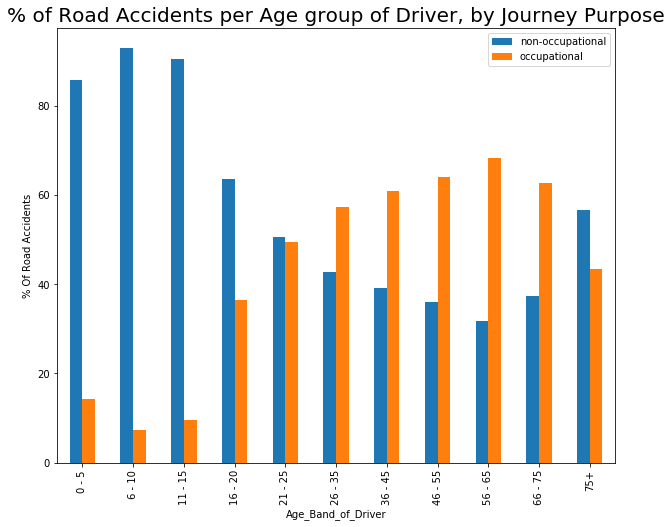

In [32]:
norm_num_by_purp_age.T.plot(kind='bar', figsize=(10,8)).legend(bbox_to_anchor=(1,1)) #plot normalised graph
plt.title('% of Road Accidents per Age group of Driver, by Journey Purpose',fontsize=20)
plt.ylabel('% Of Road Accidents')

We now see a much more interesting graph above. It is interesting to note how the trend in occupational and non-occupational journey purposes change once they are normalised.

Unlike before, there is a more even balance between non-occupational and occupational drivers. We can see from above that occupational drivers between the ages of 26-75 are involved in more accidents. However, non-occupational drivers between the ages of 0-25, and 75+ are involved in more accidents than occupational drivers. It is important to note that this graph includes data for scooters and bikes, however it is still interesting to note that there are drivers under the age of 15 whom drive occupationally!

## 4.
## Saving Pickle Files & Data Dictionaries

We will now save our grouped and normalised datasets into a pickle files, and save dictionaries to summarise their contents.

In [25]:
norm_num_by_purp_sex.to_pickle("../../data/analysis/300_analysis_Q1C_norm_num_by_purp_sex.pkl")
norm_num_by_purp_sex.shape

(2, 2)

In [26]:
data_dictionary.save(
    '../../data/analysis/300_analysis_Q1C_norm_num_by_purp_sex.pkl', 
    "Updated Roadsafety dataset with Occupational_Relational column").head()

,count,mean,std,min,25%,50%,75%,max,Missing,%Missing
Sex_of_Driver,,,,,,,,,,
female,2.0,26.761261,15.260951,15.970139,21.365700,26.761261,32.156822,37.552383,0,0.0
male,2.0,73.238739,15.260951,62.447617,67.843178,73.238739,78.634300,84.029861,0,0.0


In [27]:
norm_num_by_purp_age.to_pickle("../../data/analysis/300_analysis_Q1C_norm_num_by_purp_age.pkl")
norm_num_by_purp_age.shape

(2, 11)

In [28]:
data_dictionary.save(
    '../../data/analysis/300_analysis_Q1C_norm_num_by_purp_age.pkl', 
    "Updated Roadsafety dataset with Occupational_Relational column").head()

,count,mean,std,min,25%,50%,75%,max,Missing,%Missing
Age_Band_of_Driver,,,,,,,,,,
0 - 5,2.0,50.0,50.507627,14.285714,32.142857,50.0,67.857143,85.714286,0,0.0
6 - 10,2.0,50.0,60.552243,7.183099,28.591549,50.0,71.408451,92.816901,0,0.0
11 - 15,2.0,50.0,57.271068,9.503240,29.751620,50.0,70.248380,90.496760,0,0.0
16 - 20,2.0,50.0,19.057784,36.524112,43.262056,50.0,56.737944,63.475888,0,0.0
21 - 25,2.0,50.0,0.724461,49.487729,49.743865,50.0,50.256135,50.512271,0,0.0
